# **AP155 Lab Assignment** 
## Module 4: Fourier Transforms

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 20, 30, and 50 points, respectively).

_Due Date_: **5PM of November 23 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely\
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: November 26, 2022 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/20
* Problem 2 - []/30
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (20 pts.; 50/50 for code & discussion) 
**Fourier transform of a simple function**

1. Calculate the coefficients in the discrete Fourier transforms of the modulated sine wave $y_n = \sin(\pi n/N) sin(20\pi n/N)$ sampled at $N = 1000$ evenly spaced points using your own user-defined function. *(10 pts.)*

2. Make a plot of their amplitudes similar to the plot shown in Fig. 7.4 of the Newman text. *(10 pts.)*


**Solution**

First off, we import all the necessary packages and libraries for this problem.

In [96]:
# For calculating the coefficients
import numpy as np
from numpy import zeros, arange, sin,linspace
from math import exp, pi

# For plotting
import matplotlib.pyplot as plt
from pylab import plot,xlim,show, imshow

# For loading the files needed
from numpy import loadtxt

# For calculating ft and its inverse
from numpy.fft import rfft, irfft, rfft2, irfft2


**1.1**

<function matplotlib.pyplot.show(close=None, block=None)>

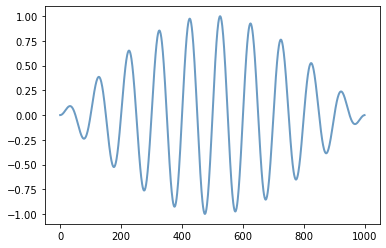

In [73]:
# Defining the values of N and n
N = 1000
n = arange(N)

# Performing the discrete fourier transform
def dft(y):
    N = len(y)
    c = zeros(N//2 +1,complex)
    n = arange(0,N)
    for k in range(N//2 + 1):
        for n in range(N):
            c[k] += y[n]*exp(-2j*pi*k*n/N)
    return c

# Defining the modulated sine wave
y_n = sin(pi*n/N)*sin(20*pi*n/N)
plt.plot(y_n, color = 'steelblue', linewidth = 2, alpha=0.8)
plt.show


**1.2**

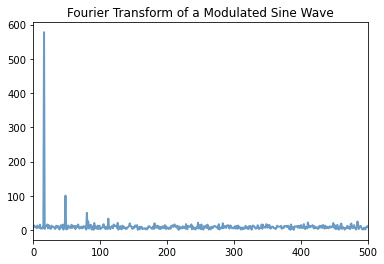

In [74]:
# Loading the pitch.txt file
y = loadtxt("pitch.txt",float) 
c = dft(y)

# Plotting the values
plt.plot(abs(c), color = 'steelblue', linewidth = 2, alpha=0.8)
plt.title("Fourier Transform of a Modulated Sine Wave")
plt.xlim(0,500)
plt.show()


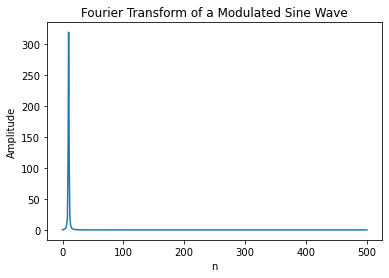

In [75]:
from numpy.fft import rfft

def f(n): 
    return sin(pi*n/N)*sin(20*pi*n/N)

results = []
xrange = linspace(0, 1, N)

for i in range(0, N, 1): 
    results.append(f(i))
    
amp = rfft(results)

# Plotting the amplitudes
plt.plot(abs(amp))
plt.title("Fourier Transform of a Modulated Sine Wave")
plt.xlabel("n")
plt.ylabel("Amplitude")
plt.show()

### PROBLEM 2 (30 pts.; 50/50 for code & discussion)

**Fourier filtering**

For this problem, you will use data from a text file called $\tt dow.txt$. It contains the daily closing value for each business day from late 2006 until the end of 2010 of the Dow Jones Industrial Average, which is a measure of average prices on the US stock market.

First, you need to make a copy of the file $\tt dow.txt$ and save it to a folder in your **own Google Drive**. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

The code cells below will (1) mount Google Drive and (2) load the data from your Google Drive. Follow the instructions below to load the data. Then, do the following:

1. Plot the data on a graph. *(5 pts.)*

2. Calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers. *(10 pts.)*

3. Now set all but the first 10% of the elements of this array to zero (i.e., set the last 90% to zero but keep the values of the first 10%). *(5 pts.)* 

4. Calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$, and plot it on the same graph as the original data. You may need to vary the colors of the two curves to make sure they both show up on the graph. Comment on what you see. What is happening when you set the Fourier coefficients to zero? *(10 pts.)*

**Solution**

Since we're using Visual Code Studio, we can skip the google drive mounting and just download the $\tt dow.txt$ file on the folder as this laboratory assignment file. We then use numpy's $\tt loadtxt$ function to load the file and save the data into a numpy array named $\tt dow$.

In [76]:
dow = loadtxt("dow.txt",float) 

Checking we if got the correct values, we print out the first 10 elements of the array $\tt dow$.

In [77]:
dow[0:10]

array([12121.71, 12136.44, 12226.73, 12221.93, 12194.13, 12283.85,
       12331.6 , 12309.25, 12278.41, 12307.48])

Before we start, let's first import all the necessary packages and libraries for this problem, which have not yet previously imported.

**2.1** First is to plot the date on a graph.

<function matplotlib.pyplot.show(close=None, block=None)>

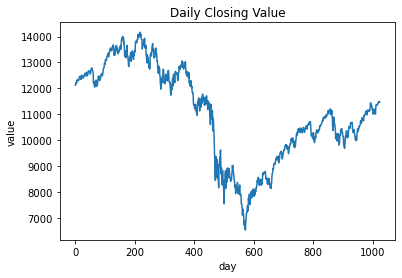

In [78]:
plt.plot(dow)
plt.title("Daily Closing Value")
plt.xlabel("day")
plt.ylabel("value")
plt.show

**2.2** Next is to calculate the coefficients of the discrete Fourier transform of the data using the function $\tt rfft$ from numpy's $\tt fft$ library, which produces an array of $\frac{1}{2}N +1$ complex numbers

In [95]:
coef = rfft(dow)

**2.3** Next is we set all the elements to 0, except the first 10% of the elements of the array

In [80]:
# Defining the 10%
tenp = int(len(coef) / 20)

# Setting the rest to 0
for i in range(tenp, len(coef), 1):
    coef[i] = 0

**2.4** Then, we calculate the inverse Fourier transform of the resulting array, zeros and all, using the function $\tt irfft$.

In [81]:
inv_dft = irfft(coef)

Lastly, we plot it in the same graph as the data above.

<function matplotlib.pyplot.show(close=None, block=None)>

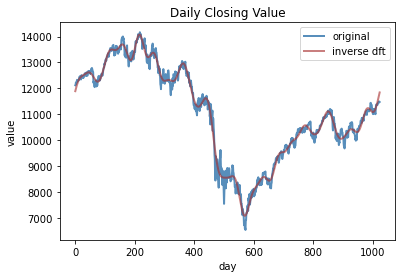

In [82]:
# Adding the plot for the inverse dft
plt.plot(dow, label = 'original', color = 'steelblue', linewidth = 2, alpha=0.9)
plt.plot(inv_dft, label = 'inverse dft',  color = 'brown', linewidth = 2, alpha=0.6)
plt.title("Daily Closing Value")
plt.xlabel("day")
plt.ylabel("value")
plt.legend()
plt.show


As we can see, the graph of the inverse fourier transform coincides or matches with that of the original graph, as what we are expecting. And as we set some values to 0, the graph smoothens out.

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Real-world Application: Image deconvolution**

_Refer to Exercise 7.9 of the Newman text_ For this problem, you will use data from a text file called $\tt blur.txt$. It contains a grid of values representing brightness on a black-and-white photo-- a badly out-of-focus one that has been deliberately blurred using a Gaussian point spread function of width $\sigma = 25$. 

Similar to what you did for Problem 2, you need to make a copy of the file $\tt blur.txt$ and save it to the same folder in your **own Google Drive** where you saved $\tt dow.txt$. This file is available from the AP155 Course Pack Google Drive (in the General > Datasets folder) and directly from this link: https://drive.google.com/file/d/1CHXGF2s9HvKJPTVRWeq5tJpgFxYuOgOg/view?usp=sharing

1. Use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers, e.g.:
```
blur = np.loadtxt(file_path+"blur.txt")
``` 
Plot the values on the screen of the computer as a density plot. (Hint: Use $\tt imshow$ and $\tt show$ from the pylab package.) You should see the photo appear. If you get something wrong it might be upside-down. Work with the details of your program until you get it appearing correctly. (Hint: The picture has the sky, which is bright, at the top and the ground, which is dark, at the bottom.) *(10 pts.)*

2. Create an array of the point spread function (PSF), of the same size as the photo, based on the Gaussian function $f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$. In particular, get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image. _Refer to the figure on page 325 of the Newman text._ *(10 pts.)*

3. Make a density plot of these values on the screen, so that you get a visualization of your point spread function. *(10 pts.)*

4. Apply Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ from numpy's $\tt fft$ package to perform image deconvolution as follows:

* Get Fourier transforms of both the blurred image and the PSF from (1) and (2) 
* Divide one by the other
* Perform an inverse transform to get the unblurred photo
* Display the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp. *(20 pts.)*

   Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero. In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very
large number (because you're dividing by something small). A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it-- just leave that coefficient alone. The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$. 

**Solution**

**3.1** We use numpy's $\tt loadtxt$ to load the grid of values into a two-dimensional array of real numbers

[[672.56065 672.34187 672.13208 ... 673.27256 673.02586 672.7886 ]
 [682.04729 681.85582 681.67331 ... 682.67747 682.45793 682.24793]
 [691.51404 691.34926 691.19339 ... 692.06431 691.87135 691.688  ]
 ...
 [644.1248  643.82057 643.52537 ... 645.09204 644.76053 644.43811]
 [653.58515 653.30996 653.0438  ... 654.46568 654.16296 653.86946]
 [663.0685  662.8218  662.58412 ... 663.86389 663.58944 663.32434]]
1024


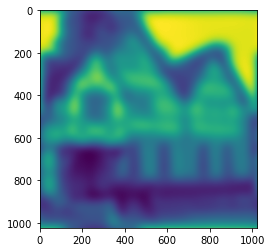

In [146]:
blur = loadtxt("blur.txt")
imshow(blur)

# Cheking the length of the data
print(blur)
print(len(blur))

**3.2** Next is we create an array of the point spread function (PSF) that is of the same size as the photo, based on the Gaussian function 

$$f(x,y) = exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)$$

where we basically have to get the sum of 4 Gaussians with $\sigma = 25$ centered on each of the four corners of the image, noting that the length of the array $1024$.

In [142]:
# Defining the width
sigma = 25 
size = len(blur)

# Defining the point spread function using the Gaussian function
def f(x, y): 
    tl = exp(-(x**2 + y**2) / (2*sigma**2))
    tr = exp(-((x-1024)**2 + y**2) / (2*sigma**2))
    bl = exp(-(x**2 + (y-1024)**2) / (2*sigma**2))
    br = exp(-((x-1024)**2 + (y-1024)**2) / (2*sigma**2))
    
    # Getting the sum of the gaussians
    return tl + tr + bl + br


**3.3** Next is to make a density plot of the values to get a visualization.

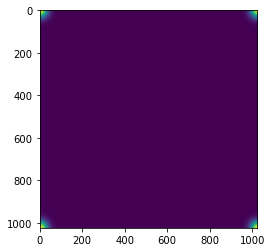

In [141]:
# Calculating the point spread function
psf = zeros([size, size])
for i in range(0, size, 1):
    for j in range(0, size, 1):
        psf[i][j] = f(i, j)
        
imshow(psf)

**3.4** Finally we perform the image deconvolution by applying Fourier transforms using the functions $\tt rfft2$ and $\tt irfft2$ on both the blurred image and the PSF from (3.1) and (3.3). Then we divide them with each other, perform an inverse transform to get the unblurred photo, and display the unblurred photo on the screen.

/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_12649/2147002299.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  unblur[i][j] = blur_ft[i][j] / psf_ft[i][j]
/var/folders/nd/l3h_t2k14fqdnbr6dbvvblth0000gn/T/ipykernel_12649/2147002299.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  unblur[i][j] = blur_ft[i][j]


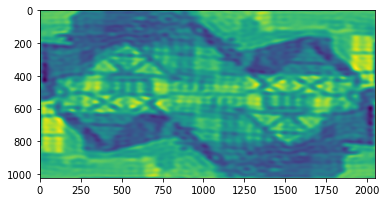

In [144]:
# Performing the fourier transform on both blur and psf
blur_ft = rfft2(blur)
psf_ft = rfft2(psf)

# Dividing the blurred image by psf 
unblur = zeros([size, size])
epsilon = 1e-3 # reasonable value of e

for i in range(0, size, 1): 
    for j in range(0, (int(size/2)) + 1, 1): 
        if psf_ft[i][j] < epsilon:
            unblur[i][j] = blur_ft[i][j] 
        else: 
            unblur[i][j] = blur_ft[i][j] / psf_ft[i][j] 

# Performing the inverse 
final_img = irfft2(unblur)

# Displaying the image
imshow(final_img)